In [ ]:
import pandas as pd

data = pd.read_csv('data_3_1_2.csv').to_numpy()

x = data[:, :2]
y = data[:, -1]

ratio = 140
x_train = x[:ratio]
y_train = y[:ratio]
x_test = x[ratio:]
y_test = y[ratio:]

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

from sklearn.svm import SVC

model = SVC(kernel='rbf', C=100)
model.fit(x_train, y_train)

z_test = model.predict(x_test)

acc_rate = (z_test==y_test).mean()

print('Accuracy Rate: %.2f' % (acc_rate*100))

Accuracy Rate: 100.00


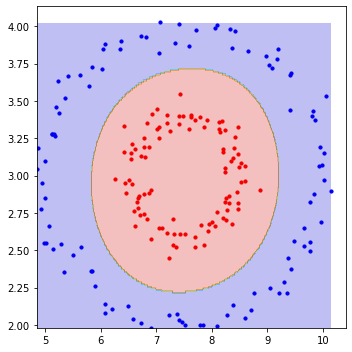

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5, 5))
id0 = np.where(y==0)
id1 = np.where(y==1)
plt.scatter(x=x[id0, 0], y=x[id0, 1], c="blue", s=10)
plt.scatter(x=x[id1, 0], y=x[id1, 1], c="red", s=10)

step = 0.01
xx = np.arange(x[:, 0].min(), x[:, 0].max(), step)
yy = np.arange(x[:, 1].min(), x[:, 1].max(), step)
xx, yy = np.meshgrid(xx, yy)
xy = np.concatenate((xx.reshape(-1, 1), yy.reshape(-1, 1)), axis=1)

z = model.predict(xy)

z[np.where(z==1)] = 3
z[np.where(z==0)] = 2

plt.contourf(xx, yy, z.reshape(xx.shape), cmap=plt.cm.jet, alpha=0.25)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
x = dataset.data
y = dataset.target

print(x.shape)
print(y.shape)


(569, 30)
(569,)
